In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
df = pd.read_csv('set/Dataset_VegetableFruits.csv')

In [5]:
df.sample(100)

,SN,Commodity,Date,Unit,Cost,Average
54987,54987,Turnip A,16-11+2017,Kg,40,45.0
190002,190002,Chilli Green(Machhe),02-03+2023,KG,70,75.0
177290,177290,Barela,18-10+2022,Kg,50,55.0
161425,161425,Bottle Gourd,18-02+2022,Kg,50,55.0
147262,147262,Soyabean Green,19-08+2021,Kg,95,97.5
...,...,...,...,...,...,...
154359,154359,Raddish White(Local),25-11+2021,Kg,45,47.5
158044,158044,Cabbage(Terai),08-01+2022,Kg,35,37.5
143087,143087,Potato White,26-06+2021,Kg,25,26.5
10041,10041,Mint,15-12-2015,Kg,140,145.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  object 
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Cost       197161 non-null  int64  
 5   Average    197161 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.0+ MB


In [7]:
df.describe()

,Cost,Average
count,197161.000000,197161.000000
mean,85.423938,89.792611
std,77.058896,79.619003
min,1.000000,5.000000
25%,40.000000,42.500000
50%,60.000000,65.000000
75%,100.000000,105.000000
max,1800.000000,1900.000000


In [8]:
df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Cost         0
Average      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.Commodity.value_counts()

Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
                        ... 
Mango(Calcutte)           23
Sweet Lime                14
Musk Melon                10
Mango(Chousa)              2
Tomato Big(Local)          1
Name: Commodity, Length: 133, dtype: int64

In [11]:
df['Date'] = df['Date'].astype(str)


In [12]:
def replace_plus(date_str):
    return date_str.replace('+', '-')

In [13]:
df['Date'] = df['Date'].apply(replace_plus)

In [14]:
def replace_plus(date_str):
    return date_str.replace('/', '-')

In [15]:
df['Date'] = df['Date'].apply(replace_plus)

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [17]:
df.isnull().sum()

SN             0
Commodity      0
Date         155
Unit           0
Cost           0
Average        0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df['Date'].value_counts()

2023-03-16    110
2023-04-19    109
2023-03-14    109
2023-03-15    108
2023-03-21    108
             ... 
2015-10-13     39
2017-03-15     39
2015-10-15     36
2015-10-14     36
2016-02-08     26
Name: Date, Length: 2751, dtype: int64

In [20]:
df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Cost         0
Average      0
dtype: int64

In [21]:
df['Date'].tail()

197156   2023-05-13
197157   2023-05-13
197158   2023-05-13
197159   2023-05-13
197160   2023-05-13
Name: Date, dtype: datetime64[ns]

In [22]:
df.drop('SN',axis=1,inplace =True)

In [23]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [24]:
df.head()

,Commodity,Date,Unit,Cost,Average,Month,Year,Day
0,Tomato Big(Local),2015-06-16,Kg,35,37.5,6,2015,16
1,Tomato Small(Local),2015-06-16,Kg,26,29.0,6,2015,16
2,Potato Red,2015-06-16,Kg,20,20.5,6,2015,16
3,Potato White,2015-06-16,Kg,15,15.5,6,2015,16
4,Onion Dry (Indian),2015-06-16,Kg,28,29.0,6,2015,16


In [25]:
df.drop(columns=['Date'], inplace=True)

In [26]:
df.head()

,Commodity,Unit,Cost,Average,Month,Year,Day
0,Tomato Big(Local),Kg,35,37.5,6,2015,16
1,Tomato Small(Local),Kg,26,29.0,6,2015,16
2,Potato Red,Kg,20,20.5,6,2015,16
3,Potato White,Kg,15,15.5,6,2015,16
4,Onion Dry (Indian),Kg,28,29.0,6,2015,16


In [27]:
df['Average']=df['Average'].astype(int)
df['Cost']=df['Cost'].astype(int)

In [28]:
df['Commodity']=df['Commodity'].str.split().str.slice(start=0,stop=3).str.join(" ")

In [29]:
df

,Commodity,Unit,Cost,Average,Month,Year,Day
0,Tomato Big(Local),Kg,35,37,6,2015,16
1,Tomato Small(Local),Kg,26,29,6,2015,16
2,Potato Red,Kg,20,20,6,2015,16
3,Potato White,Kg,15,15,6,2015,16
4,Onion Dry (Indian),Kg,28,29,6,2015,16
...,...,...,...,...,...,...,...
197156,Garlic Dry,Kg,100,110,5,2023,13
197157,Fish Fresh(Rahu),KG,270,275,5,2023,13
197158,Fish Fresh(Bachuwa),KG,225,230,5,2023,13
197159,Fish Fresh(Chhadi),KG,220,225,5,2023,13


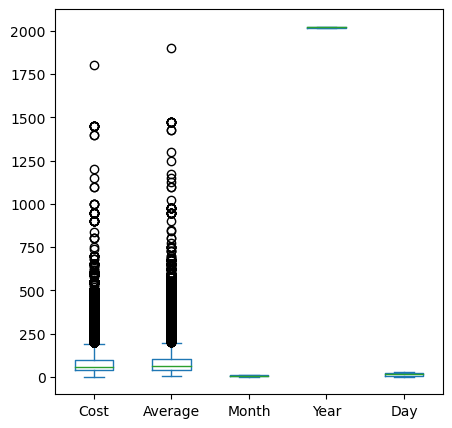

In [30]:
df.plot(kind='box')
plt.show()

<AxesSubplot:xlabel='Cost', ylabel='Average'>

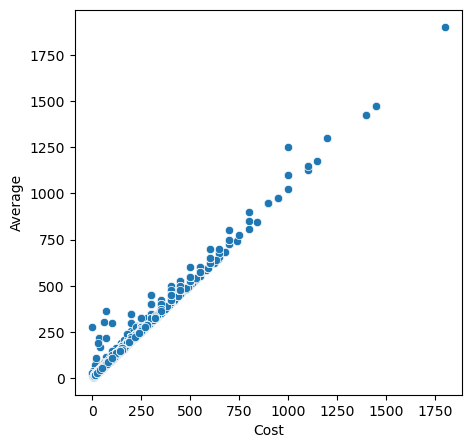

In [31]:
sns.scatterplot(x=df['Cost'],y=df['Average'])

<AxesSubplot:xlabel='Year', ylabel='Average'>

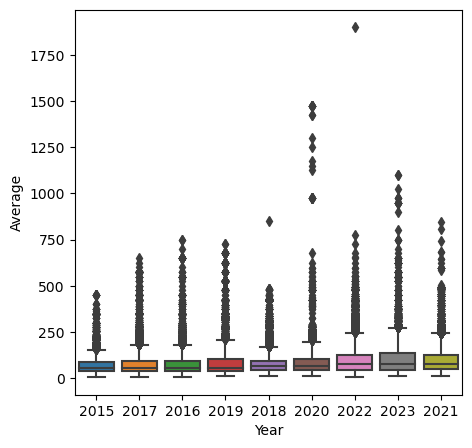

In [32]:
sorted_nb=df.groupby(['Year'])['Average'].median().sort_values()
sns.boxplot(x=df['Year'],y=df['Average'], order=list(sorted_nb.index))

In [33]:
X = df[['Commodity','Year','Average','Unit']]
Y = df['Cost']

In [34]:
X

,Commodity,Year,Average,Unit
0,Tomato Big(Local),2015,37,Kg
1,Tomato Small(Local),2015,29,Kg
2,Potato Red,2015,20,Kg
3,Potato White,2015,15,Kg
4,Onion Dry (Indian),2015,29,Kg
...,...,...,...,...
197156,Garlic Dry,2023,110,Kg
197157,Fish Fresh(Rahu),2023,275,KG
197158,Fish Fresh(Bachuwa),2023,230,KG
197159,Fish Fresh(Chhadi),2023,225,KG


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [38]:
ohe=OneHotEncoder()
ohe.fit(X[['Commodity','Unit']])

OneHotEncoder()

In [39]:
c_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Commodity','Unit']),remainder='passthrough')

In [40]:
lr=LinearRegression()

In [41]:
pipe=make_pipeline(c_trans,lr)

In [42]:

X_train = pd.DataFrame(X_train, columns=['Commodity', 'Year', 'Average', 'Unit'])
pipe.fit(X_train, Y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Bakula',
       'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower',
       'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long',
       'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabb...
       'Sword Bean', 'Tamarind', 'Tofu', 'Tomato Big',
       'Tomato Big(Indian)', 'Tomato Big(Local)', 'Tomato Small(Indian)',
       'Tomato Small(Local)', 'Tomato Small(Terai)',
       'Tomato Small(Tunnel)', 'Turnip', 'Turnip A',
       'Water Melon(Dotted)', 'Water Melon(Green)', 'Yam'], dtype=object),
                                                                            array(['1 Pc', 'Doz', 'KG', 'Kg'], dtype=object)]),
                                                  ['Commod

In [43]:
Y_pred=pipe.predict(X_test)

In [44]:
r2_score(Y_test,Y_pred)

0.9982393766732287

In [45]:
scores=[]
for i in range(1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)
    lr=LinearRegression()
    pipe=make_pipeline(c_trans,lr)
    pipe.fit(X_train,Y_train)
    Y_pred=pipe.predict(X_test)
    scores.append(r2_score(Y_test,Y_pred))
    
    

In [46]:
np.argmax(scores)

0

In [47]:
scores[np.argmax(scores)]

0.9980869537897146

In [48]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Tomato Big(Local)',2015,37,'Kg']).reshape(1,4)))

array([33.87009056])

In [49]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(c_trans,lr)
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
r2_score(Y_test,Y_pred)


0.9980497588520921

In [50]:
import pickle

In [51]:
pickle.dump(pipe,open('LRModel.pkl','wb'))

In [52]:
pipe.predict(pd.DataFrame(columns=['Commodity','Year','Average','Unit'],data=np.array(['Tomato Big(Local)',2015,37,'Kg']).reshape(1,4)))

array([33.89591361])

In [53]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Bakula',
       'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower',
       'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long',
       'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabbage(Local)',
       'Cabbage(Terai)', 'Capsicum', 'Carrot(Local)', 'Carrot(Terai)',
       'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery',
       'Chilli Dry', 'Chilli Green', 'Chilli Green(Akbare)',
       'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Christophine',
       'Clive Dry', 'Clive Green', 'Coriander Green', 'Cow pea(Long)',
       'Cowpea(Short)', 'Cress Leaf', 'Cucumber(Hybrid)',
       'Cucumber(Local)', 'Drumstick', 'Fennel Leaf', 'Fenugreek Leaf',
       'Fish Fresh', 'Fish Fresh(Bachuwa)', 'Fish Fresh(Chhadi)',
       'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)', 'French Bean(Hybrid)',
       'French Bean(Local)', 'French Bean(Rajma)', 'Garlic Dry',
       'Garlic Dry Chinese', 'Garlic Green', 'Ginge